# Mycobacteria

A notebook for the exploration of Mycobacteria.

Note that we use our data from the Autoencoding for this, but we have already calculated and stored that data so we can reload it here!

## Set up and reading the data

In [1]:
import os
import sys
from socket import gethostname

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib


In [2]:
import shap

In [3]:
sequence_type = "MGI"
datadir = '..'
sslevel = 'subsystems_norm_ss.tsv.gz'
taxa = "family"

df, metadata = cf_analysis_lib.read_the_data(sequence_type, datadir, sslevel=sslevel, taxa=taxa)
print(f"The data frame has shape {df.shape}")

The data frame has shape (127, 1512)


Using ../MGI/FunctionalAnalysis/subsystems/MGI_subsystems_norm_ss.tsv.gz for the subsystems


In [4]:
outdir = 'mycobacteria'
os.makedirs(outdir, exist_ok=True)

## Make a boxplot

In [5]:
for c in df.columns:
    if 'myco' in c.lower():
        print(c)

Biosynthesis of Arabinogalactan in Mycobacteria
Cell wall-associated cluster in Mycobacterium
ESAT-6 protein secretion system in Mycobacteria (locus ESX-5)
ESAT-6 proteins secretion system in Mycobacteria (locus ESX-1)
ESAT-6 proteins secretion system in Mycobacteria (locus ESX-3)
ESAT-6 proteins secretion system in Mycobacteria (locus ESX-4)
Galactosamine Substituent of Arabinogalactan in Mycobacteria
Glutathione analogs: mycothiol
Mycobacterial FadD proteins (fatty acid CoA- and AMP- ligases)
Mycobacterial FadE proteins Acyl-CoA dehydrogenase
Mycobacterial HadABC proteins ((3R)-hydroxyacyl-ACP dehydrates of FASII)
Mycobacterial cell wall virulence lipid phthiocerol dimycocerosate (PDIM)
Mycobacterial gene cluster associated with resistance against FAS-II antibiotics
Mycobacterial heme acquisition system
Mycobacterial lipid and multidrug efflux system proteins MmpL, MmpS
Mycobacterial lipoproteins (LPR group)
Mycobacterial multidrug efflux systems implicated in AMR 
Mycobacterial sign

In [6]:
myco = metadata[['NTM',
                 'CS_Mycobacteroides abscessus', 'CS_Mycobacterium intracellulare', 'CS_NTM_(Smear negative)', 'CS_MAC_(Smear negative)',
                 'O_Mycobacterium abscessus', 'O_Mycobacterium intracellular', 'O_Mycobacterium mucogenicum', 'O_Mycobacterium scotochromogen', 
                 'P12M_4_Rapid NTM', 'P12M_5_Slow NTM',
                 'N12M_MAC'
                ]].fillna(0).copy()
merged = df[['Mycobacteriaceae']].join(myco)
merged

,Mycobacteriaceae,NTM,CS_Mycobacteroides abscessus,CS_Mycobacterium intracellulare,CS_NTM_(Smear negative),CS_MAC_(Smear negative),O_Mycobacterium abscessus,O_Mycobacterium intracellular,O_Mycobacterium mucogenicum,O_Mycobacterium scotochromogen,P12M_4_Rapid NTM,P12M_5_Slow NTM,N12M_MAC
1068841_20180306_S,852.495618,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1447437_20171212_S,673.091652,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20171206_S,612.738511,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20171218_S,541.690413,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1128691_20180116_S,619.114510,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895293_20180502_S,740.122586,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
896213_20180427_S,1286.394580,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
913873_20180417_S,1623.254058,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
980574_20180403_S,997.364482,0.0,0,0,0,0,0,0,0,0,0.0,0.0,1.0


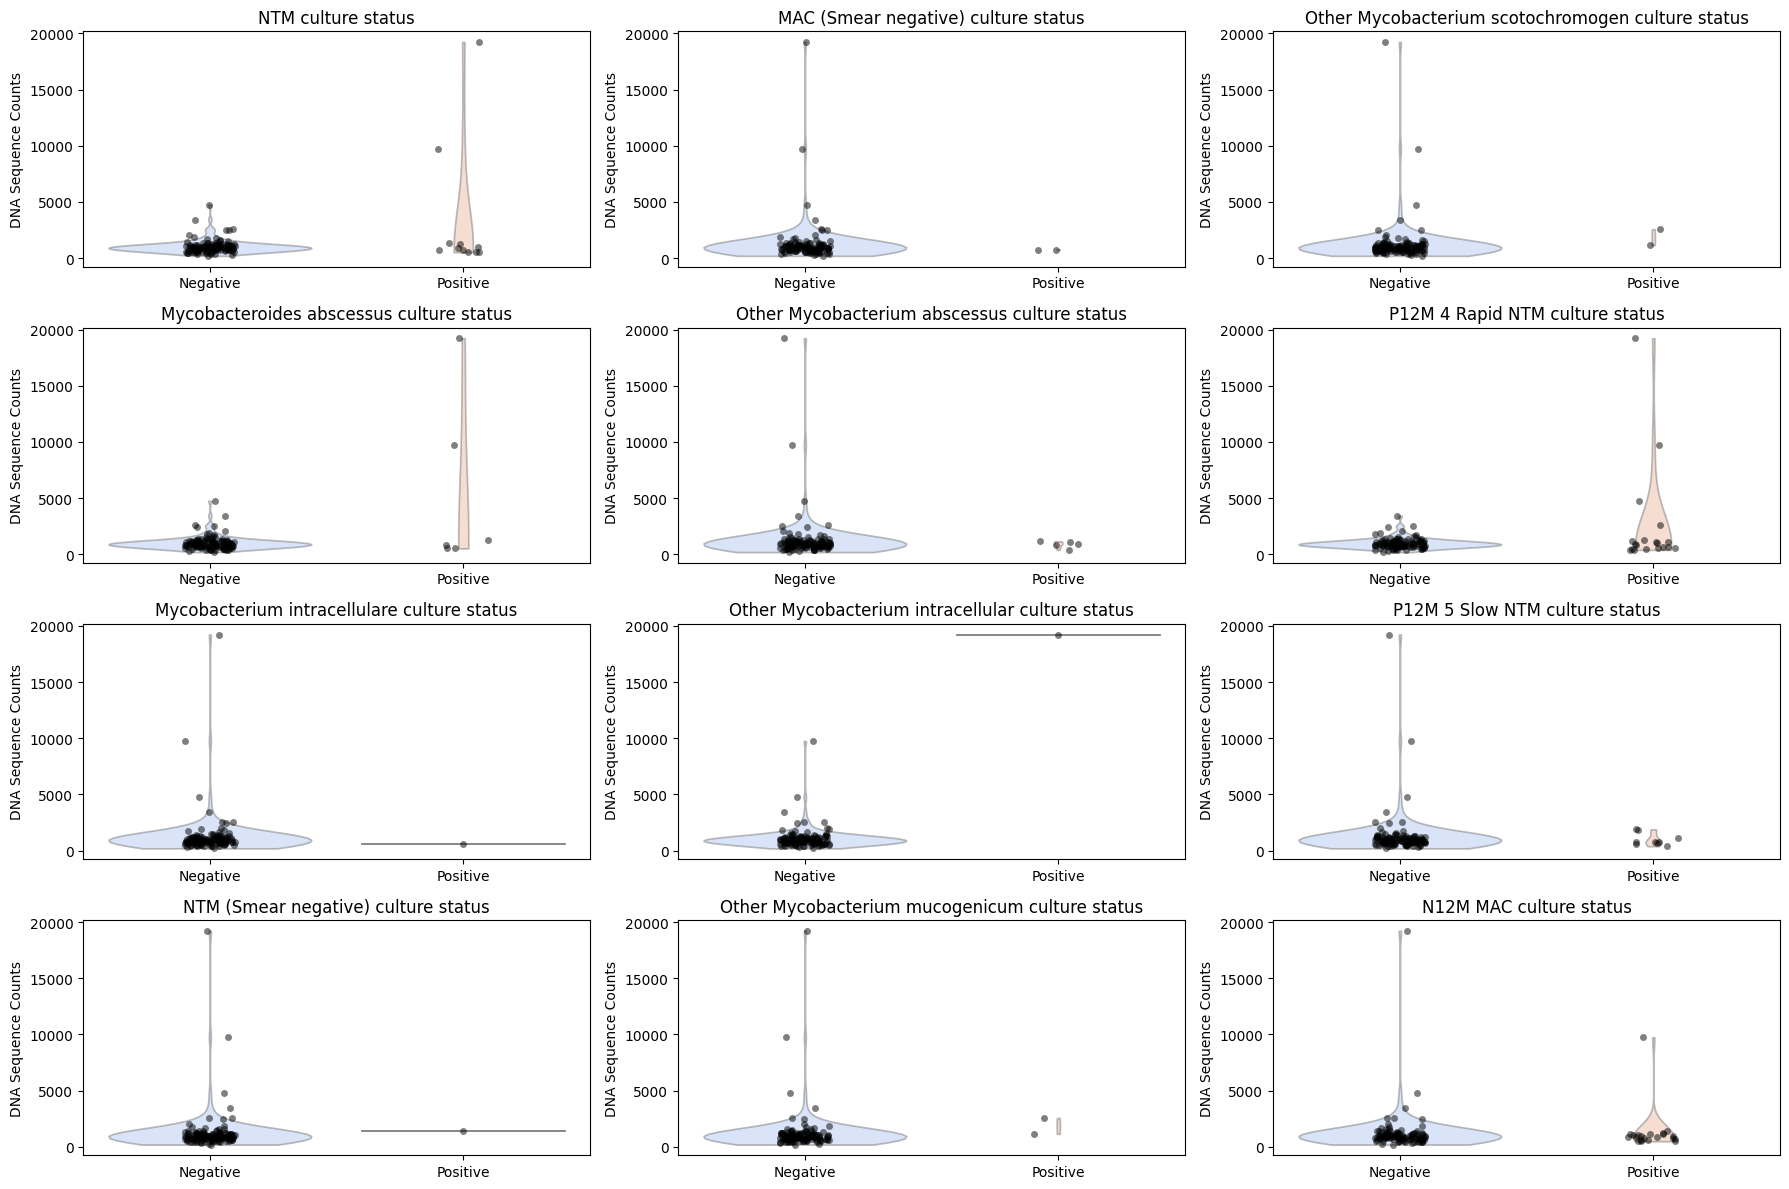

In [7]:
fig, ax = plt.subplots(figsize=(18, 12), nrows=4, ncols=3, sharex=False, sharey=False)

y='Mycobacteriaceae'
k = 0
for i in [0, 1, 2]:
    for j in [0, 1, 2, 3]:
        culture_taxa = myco.columns[k]
        ctitle = culture_taxa.replace('O_', 'Other ').replace('CS_', '').replace('_', ' ')
        g = sns.violinplot(x=culture_taxa, y=y, data=merged, hue=culture_taxa, palette='coolwarm', alpha=0.5, ax=ax[j][i], legend=False, inner=None, density_norm='count', common_norm=True, cut=0)
        g = sns.stripplot(x=culture_taxa, y=y, data=merged, color='black', jitter=True, alpha=0.5, ax=ax[j][i], legend=False)
        g.set_xlabel("")
        g.set_ylabel("DNA Sequence Counts")
        g.set_xlim(-0.5, 1.5)
        g.set_xticks(ticks=[0, 1], labels=["Negative", "Positive"])
        g.set_title(f"{ctitle} culture status")
        k+=1
        

plt.tight_layout()
plt.show()

### Read the autoencoder

In [8]:
encoder_models = 'cluster_gbrfs'
if not os.path.exists(os.path.join(encoder_models, 'clusters.json')):
    print("Please run the autoencoder code before trying to load the models.", file=sys.stderr)
    exit(1)

if not os.path.exists(os.path.join(encoder_models, 'pc_df.tsv')):
    print("Please create and save the PCA before trying to load the models.", file=sys.stderr)
    exit(1)

with open(os.path.join(encoder_models, 'clusters.json'), 'r') as file:
    data = json.load(file)
tmpjsondf = pd.DataFrame(list(data.items()), columns=['Cluster', 'Feature'])
cluster_assignments = tmpjsondf.explode('Feature').reset_index(drop=True)
cluster_assignments['Cluster'] = cluster_assignments['Cluster'].astype(int)

pc_df = pd.read_csv(os.path.join(encoder_models, 'pc_df.tsv'), sep="\t", index_col=0)

## Which metadata columns are Mycobacteria?

In [19]:
for c in sorted(metadata.columns):
    if 'trichosporon mycotoxinivorans' in c.lower():
        continue
    if 'mac' in c.lower() or 'ntm' in c.lower() or 'myco' in c.lower():
        print(f"'{c}', ", end="")
print()

'CS_MAC_(Smear negative)', 'CS_Mycobacterium intracellulare', 'CS_Mycobacteroides abscessus', 'CS_Mycolicibacter terrae', 'CS_NTM_(Smear negative)', 'Mycobacteria', 'N12M_MAC', 'NTM', 'O_Mycobacterium abscessus', 'O_Mycobacterium intracellular', 'O_Mycobacterium mucogenicum', 'O_Mycobacterium scotochromogen', 'P12M_4_Rapid NTM', 'P12M_5_Slow NTM', 


### Who has what?

This table shows which of our patients has Mycobacteria, and we make a single column, _Mycobacteria_, for any of the observations. 

Is it the NA values?

In [133]:
if 'Mycobacteria' in metadata.columns:
    metadata = metadata.drop('Mycobacteria', axis=1)
    
myco_all = metadata[['CS_MAC_(Smear negative)', 'CS_Mycobacterium intracellulare', 'CS_Mycobacteroides abscessus', 'CS_Mycolicibacter terrae', 'CS_NTM_(Smear negative)', 
                     'N12M_MAC', 'NTM', 
                     'O_Mycobacterium abscessus', 'O_Mycobacterium intracellular', 'O_Mycobacterium mucogenicum', 'O_Mycobacterium scotochromogen', 
                     'P12M_4_Rapid NTM', 'P12M_5_Slow NTM'
                ]].dropna(axis=0).copy()

myco_now = metadata[['CS_MAC_(Smear negative)', 'CS_Mycobacterium intracellulare', 'CS_Mycobacteroides abscessus', 
                     'CS_Mycolicibacter terrae', 'CS_NTM_(Smear negative)']].dropna(axis=0).copy()

myco_mac = metadata[['CS_MAC_(Smear negative)', 'CS_Mycobacteroides abscessus',  'O_Mycobacterium abscessus']].dropna(axis=0).copy()

myco_mac_any = metadata[['CS_MAC_(Smear negative)', 'CS_Mycobacteroides abscessus',  'O_Mycobacterium abscessus', 'P12M_5_Slow NTM', 'N12M_MAC']].dropna(axis=0).copy()

myco_ntm = metadata[['NTM']].dropna(axis=0).copy()

# change the line below to one of the above!
which_myco = myco_ntm


which_myco['Mycobacteria_sum'] = which_myco.astype(int).sum(axis=1)
which_myco['Mycobacteria'] = which_myco['Mycobacteria_sum'] > 0

# myco[myco['Mycobacteria']].to_csv('mycobacteria/mycobacteria.tsv', sep="\t")

metadata['Mycobacteria'] = which_myco['Mycobacteria'].astype(int).astype('category')

print(f"There are {which_myco[which_myco['Mycobacteria']].shape[0]} samples that have Mycobacteria", file=sys.stderr)

There are 11 samples that have Mycobacteria


## Run the Gradient Boosted Random Forest

The data for the classifier is {'no': 114, 'yes': 11} variables
We used 200 estimators for the random forest classifier


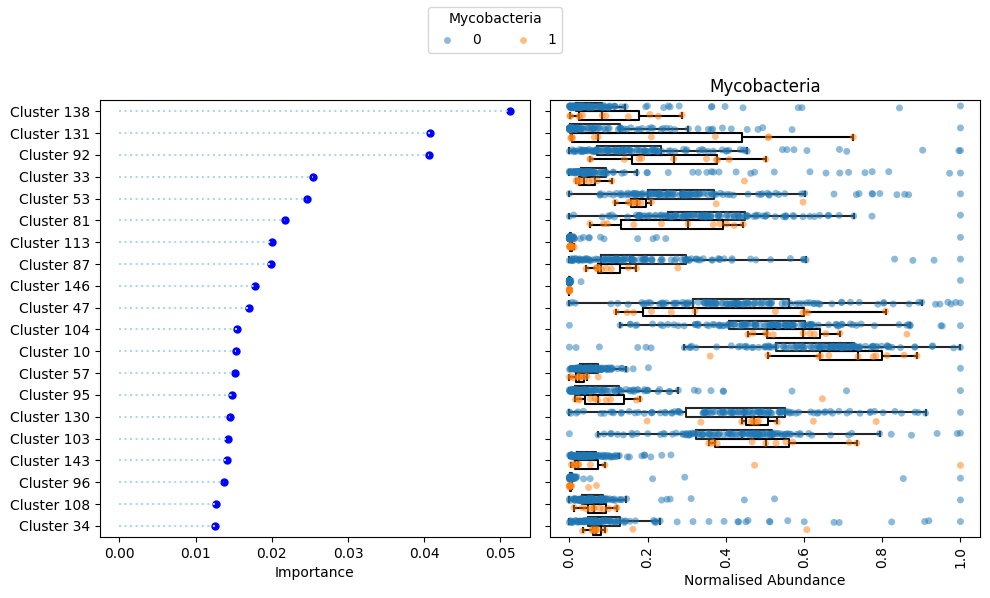

In [134]:
intcol = 'Mycobacteria'

intcol_title = replace_index.sub('', intcol).replace('_', ' ')
merged_df = pc_df.join(metadata[[intcol]]).dropna(subset=intcol)

categorical_data, custom_labels = cf_analysis_lib.create_custom_labels(metadata, intcol, merged_df)

X = merged_df.drop(intcol, axis=1)
y = merged_df[intcol]

if categorical_data:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_classifier_model(X, y, n_estimators=1000, n_iter_no_change=20)
  met = 'classifier'
else:
  model, mse, feature_importances_sorted = cf_analysis_lib.gb_regressor_model(X, y)
  met = 'regressor'

print(f"We used {model.n_estimators_} estimators for the random forest {met}", file=sys.stderr)
cf_analysis_lib.plot_one_top_feature(merged_df, feature_importances_sorted, intcol, intcol_title, custom_labels)

## Use SHAP to find the features that are important for the presence of something

Right now the GBRF is agnostic to whether an important feature is associated with presence (1) or absence (0) — it just finds features that split the data well.

Here, we loook for things positively associated with 1.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def rank_presence_indicators(
    model,
    X: pd.DataFrame,
    positive_label=1,
    output_space: str = "probability",  # "probability" (uses interventional) or "raw" (log-odds, fast)
    top_n = None,
    return_values: bool = False
):
    """
    Rank features by how strongly they push predictions toward the *presence* class.

    Parameters
    ----------
    model : fitted classifier (e.g., sklearn.GradientBoostingClassifier)
    X : pandas.DataFrame used for training (same columns/order)
    positive_label : which class to treat as "presence" (default=1)
    output_space : "probability" (slower; additive in prob space) or "raw" (log-odds; faster)
    top_n : if set, return only the top N features
    return_values : if True, also return the SHAP array used for presence

    Returns
    -------
    ranked_df : DataFrame with columns:
        - feature
        - mean_shap_for_presence (signed; probability or log-odds)
        - abs_mean_shap
    (optional) shap_presence : np.ndarray of SHAP values used to compute the ranking
    """

    # Map presence label to model class index
    classes = np.asarray(model.classes_)
    if positive_label not in classes:
        raise ValueError(f"positive_label {positive_label!r} not in model.classes_: {classes}")
    pos_idx = int(np.where(classes == positive_label)[0][0])

    # Configure explainer safely
    if output_space == "probability":
        explainer = shap.TreeExplainer(
            model,
            model_output="raw",
            feature_perturbation="interventional",  # required for probability output
        )
    elif output_space == "raw":
        # Fast path (tree_path_dependent); values are in log-odds
        explainer = shap.TreeExplainer(model)
    else:
        raise ValueError('output_space must be "probability" or "raw"')

    shap_values = explainer.shap_values(X)

    # Normalize shapes:
    # - Multiclass: list of arrays, one per class -> pick pos_idx
    # - Binary:
    #   * "probability": newer SHAP typically returns a list [class0, class1]; pick pos_idx
    #   * Sometimes returns a single array for P(last_class); if presence != last class, flip sign
    #   * "raw": often a single array of log-odds; direction is toward the model's positive output
    if isinstance(shap_values, list):
        shap_presence = shap_values[pos_idx]  # shape (n_samples, n_features)
    else:
        shap_presence = shap_values  # shape (n_samples, n_features)
        if output_space == "probability":
            # Probability single-array case corresponds to last class
            if pos_idx != (len(classes) - 1):
                shap_presence = -shap_presence
        else:
            # Raw log-odds single-array: sign already indicates move toward the model's raw output
            # (which corresponds to the last class). Flip if presence is not the last class.
            if pos_idx != (len(classes) - 1):
                shap_presence = -shap_presence

    mean_shap_presence = shap_presence.mean(axis=0)

    ranked_df = pd.DataFrame({
        "feature": X.columns,
        "mean_shap_for_presence": mean_shap_presence
    })
    ranked_df["abs_mean_shap"] = ranked_df["mean_shap_for_presence"].abs()
    ranked_df = ranked_df.sort_values(
        ["mean_shap_for_presence", "abs_mean_shap"],
        ascending=[False, False]
    ).reset_index(drop=True)

    if top_n is not None:
        ranked_df = ranked_df.head(top_n).reset_index(drop=True)

    return (ranked_df, shap_presence, shap_values) if return_values else ranked_df


presence_rank, shap_presence, shap_values = rank_presence_indicators(model, X, positive_label=1, top_n=None, return_values=True)
print(presence_rank.head(20))


        feature  mean_shap_for_presence  abs_mean_shap
0   Cluster 108                0.003273       0.003273
1     Cluster 9                0.002182       0.002182
2    Cluster 90                0.002143       0.002143
3    Cluster 42                0.002075       0.002075
4   Cluster 103                0.002029       0.002029
5    Cluster 34                0.001984       0.001984
6   Cluster 114                0.001970       0.001970
7     Cluster 4                0.001909       0.001909
8    Cluster 67                0.001883       0.001883
9   Cluster 134                0.001876       0.001876
10   Cluster 86                0.001815       0.001815
11   Cluster 12                0.001770       0.001770
12   Cluster 35                0.001747       0.001747
13  Cluster 143                0.001735       0.001735
14   Cluster 82                0.001709       0.001709
15   Cluster 25                0.001679       0.001679
16    Cluster 5                0.001601       0.001601
17   Clust

In [136]:
presence_rank[presence_rank['feature']=='Cluster 137']

,feature,mean_shap_for_presence,abs_mean_shap
39,Cluster 137,0.000633,0.000633


In [62]:
positive_label=1
top_n=None
output_space: str = "probability"

# Map presence label to model class index
classes = np.asarray(model.classes_)
if positive_label not in classes:
    raise ValueError(f"positive_label {positive_label!r} not in model.classes_: {classes}")
pos_idx = int(np.where(classes == positive_label)[0][0])

# Configure explainer safely
if output_space == "probability":
    explainer = shap.TreeExplainer(
        model,
        model_output="raw",
        feature_perturbation="interventional",  # required for probability output
    )
elif output_space == "raw":
    # Fast path (tree_path_dependent); values are in log-odds
    explainer = shap.TreeExplainer(model)
else:
    raise ValueError('output_space must be "probability" or "raw"')

shap_values = explainer.shap_values(X)

# Normalize shapes:
# - Multiclass: list of arrays, one per class -> pick pos_idx
# - Binary:
#   * "probability": newer SHAP typically returns a list [class0, class1]; pick pos_idx
#   * Sometimes returns a single array for P(last_class); if presence != last class, flip sign
#   * "raw": often a single array of log-odds; direction is toward the model's positive output
if isinstance(shap_values, list):
    shap_presence = shap_values[pos_idx]  # shape (n_samples, n_features)
else:
    shap_presence = shap_values  # shape (n_samples, n_features)
    if output_space == "probability":
        # Probability single-array case corresponds to last class
        if pos_idx != (len(classes) - 1):
            shap_presence = -shap_presence
    else:
        # Raw log-odds single-array: sign already indicates move toward the model's raw output
        # (which corresponds to the last class). Flip if presence is not the last class.
        if pos_idx != (len(classes) - 1):
            shap_presence = -shap_presence

mean_shap_presence = shap_presence.mean(axis=0)

ranked_df = pd.DataFrame({
    "feature": X.columns,
    "mean_shap_for_presence": mean_shap_presence
})
ranked_df["abs_mean_shap"] = ranked_df["mean_shap_for_presence"].abs()
ranked_df = ranked_df.sort_values(
    ["mean_shap_for_presence", "abs_mean_shap"],
    ascending=[False, False]
).reset_index(drop=True)




In [64]:
shap_values.shape

(127, 150)

In [70]:
shap_values_df = pd.DataFrame(shap_values, index=X.index, columns=X.columns)
shap_values_df[['Cluster 131', 'Cluster 3']]

,Cluster 131,Cluster 3
1068841_20180306_S,-0.009703,-0.006189
1447437_20171212_S,-0.009641,-0.006763
1128691_20171206_S,-0.008168,-0.005721
1128691_20171218_S,-0.009645,-0.005721
1128691_20180116_S,-0.008168,-0.004866
...,...,...
895293_20180502_S,-0.009644,-0.005850
896213_20180427_S,-0.009283,-0.006856
913873_20180417_S,-0.009644,-0.006003
980574_20180403_S,-0.009703,-0.006764


In [73]:
shap_presence_df = pd.DataFrame(shap_presence, index=X.index, columns=X.columns)
shap_presence_df[['Cluster 131', 'Cluster 3']]

,Cluster 131,Cluster 3
1068841_20180306_S,-0.009703,-0.006189
1447437_20171212_S,-0.009641,-0.006763
1128691_20171206_S,-0.008168,-0.005721
1128691_20171218_S,-0.009645,-0.005721
1128691_20180116_S,-0.008168,-0.004866
...,...,...
895293_20180502_S,-0.009644,-0.005850
896213_20180427_S,-0.009283,-0.006856
913873_20180417_S,-0.009644,-0.006003
980574_20180403_S,-0.009703,-0.006764


In [82]:
mean_shap_presence = shap_presence.mean(axis=0)
mean_shap_presence_df = pd.DataFrame(mean_shap_presence, index=X.columns, columns=['Mean Shap Presence'])
mean_shap_presence_df['Abs'] = mean_shap_presence_df['Mean Shap Presence'].abs()
mean_shap_presence_df.sort_values(by='Abs', ascending=False)

,Mean Shap Presence,Abs
Cluster 65,-0.002627,0.002627
Cluster 3,0.002217,0.002217
Cluster 132,-0.001827,0.001827
Cluster 109,0.001767,0.001767
Cluster 53,-0.001744,0.001744
...,...,...
Cluster 71,0.000000,0.000000
Cluster 68,0.000000,0.000000
Cluster 63,0.000000,0.000000
Cluster 61,0.000000,0.000000


In [89]:
abs_mean = np.abs(shap_presence).mean(axis=0)

compare_df = pd.DataFrame({
    "feature": X.columns,
    "mean_signed": shap_presence.mean(axis=0),
    "mean_abs": abs_mean
}).sort_values("mean_abs", ascending=False)

compare_df.head(20)

,feature,mean_signed,mean_abs
130,Cluster 131,-0.000288,0.016846
2,Cluster 3,0.002217,0.013353
111,Cluster 112,-0.001597,0.012191
131,Cluster 132,-0.001827,0.010172
34,Cluster 35,0.001336,0.009853
106,Cluster 107,0.000330,0.009573
107,Cluster 108,-0.000069,0.008961
64,Cluster 65,-0.002627,0.008555
52,Cluster 53,-0.001744,0.007050
49,Cluster 50,0.000183,0.006984


In [96]:
cluster_assignments[cluster_assignments['Feature'].str.lower().str.contains('myco')].sort_values(by='Cluster')

,Cluster,Feature
151,28,Biosynthesis of Arabinogalactan in Mycobacteria
186,31,Mycobacterial gene cluster associated with res...
187,31,Mycobacterial FadE proteins Acyl-CoA dehydroge...
188,31,Mycobacterial FadD proteins (fatty acid CoA- a...
294,37,Mycolic acid synthesis 2
310,41,Mycobacterial heme acquisition system
329,43,Mycobacterial HadABC proteins ((3R)-hydroxyacy...
333,43,Glutathione analogs: mycothiol
416,63,Mycobacterial lipoproteins (LPR group)
553,87,Galactosamine Substituent of Arabinogalactan i...


In [56]:
shap_presence

array([[-0.00104274,  0.        , -0.00618878, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00104243,  0.        , -0.00676257, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00104315,  0.        , -0.005721  , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.00104311,  0.        , -0.00600292, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00104263,  0.        , -0.00676432, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00104318,  0.        , -0.00474422, ...,  0.        ,
         0.        ,  0.        ]])

In [60]:
presence_rank[presence_rank['feature'].isin(presence_rank.head(10)['feature'])]

,feature,mean_shap_for_presence,abs_mean_shap
0,Cluster 3,0.002217,0.002217
1,Cluster 109,0.001767,0.001767
2,Cluster 10,0.001360,0.001360
3,Cluster 35,0.001336,0.001336
4,Cluster 101,0.000724,0.000724
5,Cluster 28,0.000675,0.000675
6,Cluster 78,0.000629,0.000629
7,Cluster 39,0.000571,0.000571
8,Cluster 97,0.000560,0.000560
9,Cluster 83,0.000519,0.000519


In [55]:

presence_rank[presence_rank['feature']=='Cluster 131']

,feature,mean_shap_for_presence,abs_mean_shap
136,Cluster 131,-0.000288,0.000288


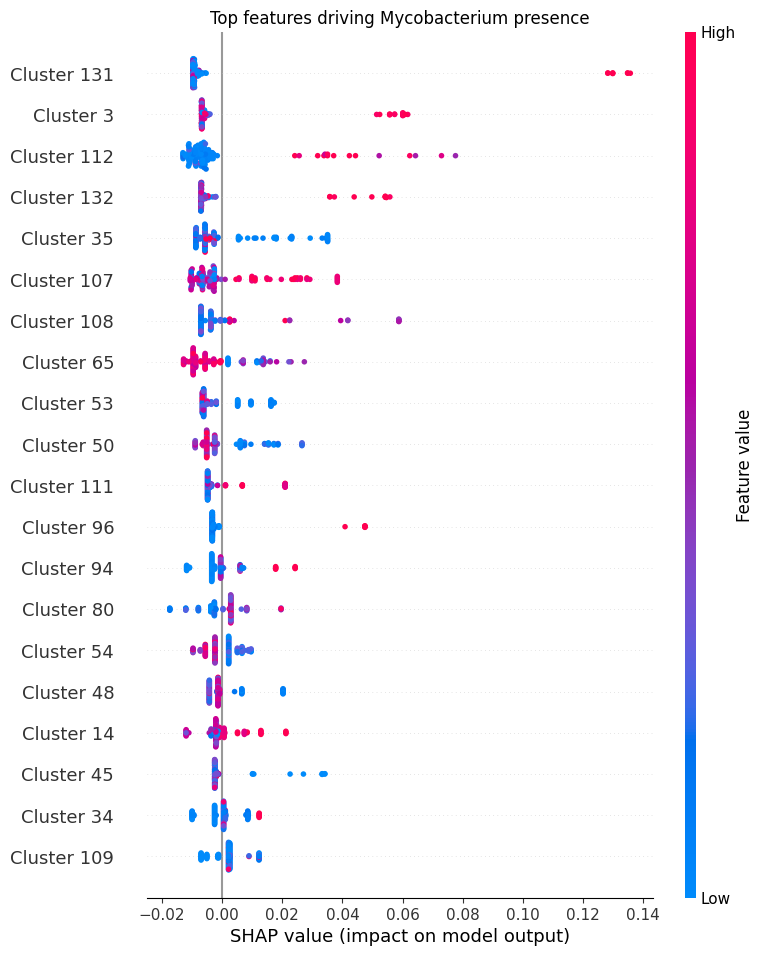

In [48]:
shap.summary_plot(shap_presence, X, show=False)
plt.title("Top features driving Mycobacterium presence")
plt.show()


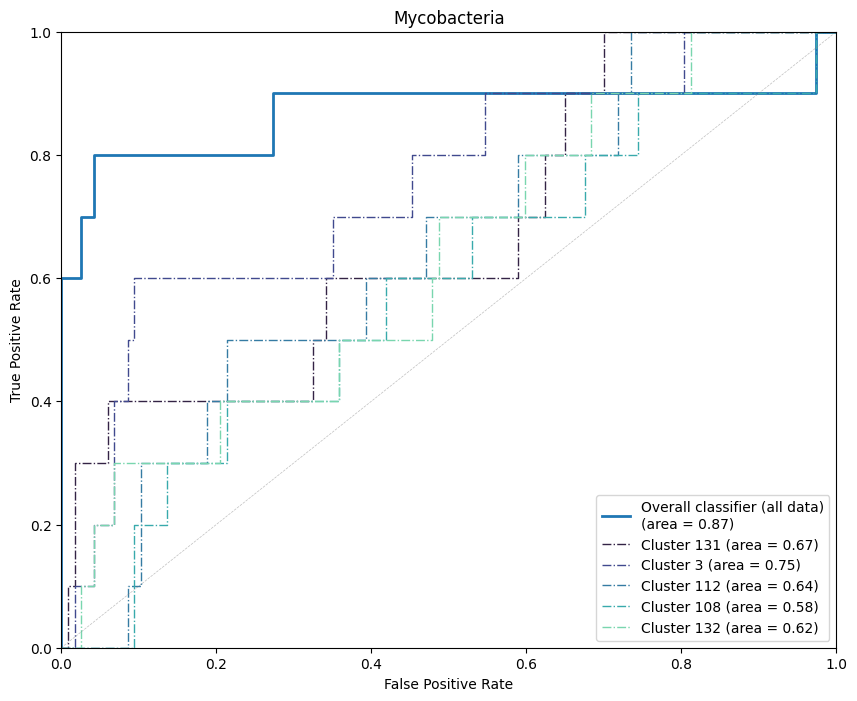

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = cf_analysis_lib.plot_roc_curves(model, X, y, feature_importances_sorted, met, intcol_title, ax=ax)
plt.show()

'Mycobacteria' has samples from 10 pwCF


Wrote the new image to mycobacteria/img/clusters_manual/Mycobacteria_Cluster_131.png


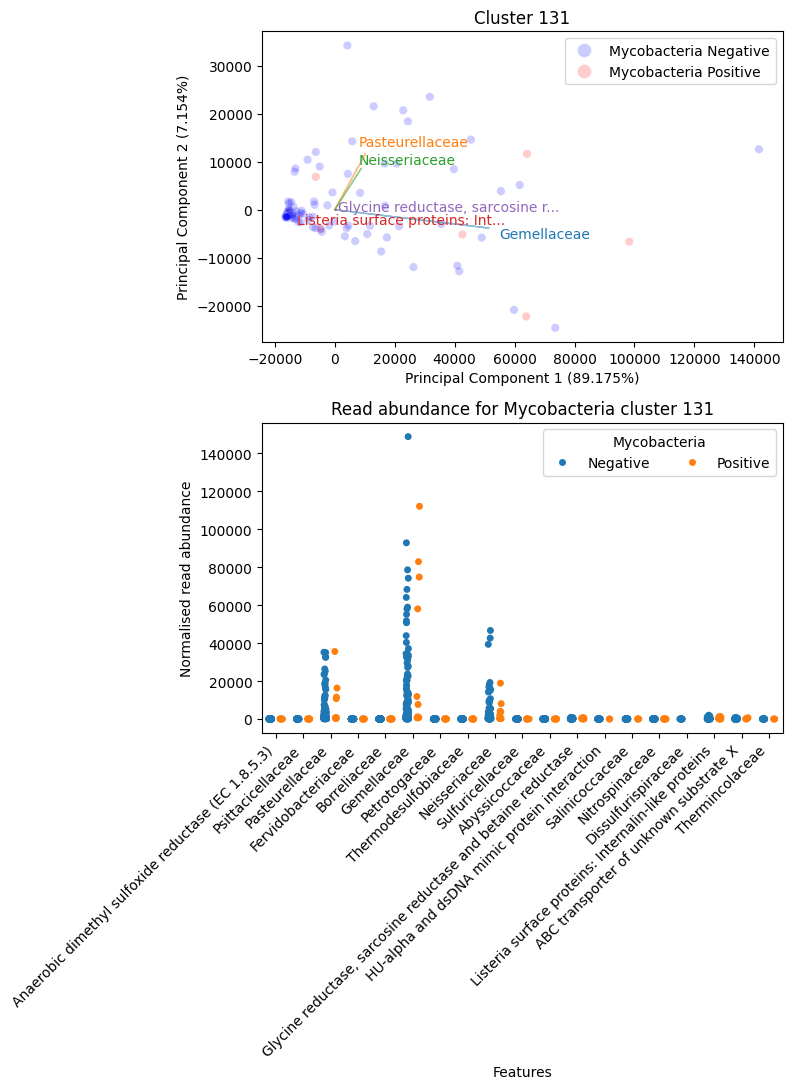

In [50]:
interesting_cluster = 131
print(f"'{intcol}' has samples from {metadata.groupby(intcol).size()[1]} pwCF")

if isinstance(interesting_cluster, int):
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
elif 'Cluster' in interesting_cluster:
    interesting_cluster_filename = interesting_cluster.replace(" ", "_")
else:
    interesting_cluster_filename = f"Cluster_{interesting_cluster}"
intcol_filename = intcol.replace(" ", "_")
intcol_filename = replace_nonword.sub('', intcol_filename)


# make a new dir so we don't overwrite!
os.makedirs(os.path.join(outdir, "img", "clusters_manual"), exist_ok=True)

pca = PCA(n_components=2)
int_cluster_num = interesting_cluster

df_clust = df[cluster_assignments.loc[cluster_assignments["Cluster"] == int_cluster_num, "Feature"]]
merged_df_clust = df_clust.join(metadata[intcol], how='inner')
df_clust = merged_df_clust.drop(intcol, axis=1)

pca_result = pca.fit_transform(df_clust)
pca_df = pd.DataFrame(data=pca_result, index=df_clust.index, columns=['PC1', 'PC2'])

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=df_clust.columns, columns=['PC1', 'PC2'])

# Create a DataFrame for top loadings
top_loadings_df = loadings_df.loc[loadings_df['PC1'].abs().sort_values(ascending=False).index]
top_loadings_df.head()

explained_variance = pca.explained_variance_ratio_ * 100
pc1_variance = explained_variance[0]
pc2_variance = explained_variance[1]

# don't forget to change the legend
intcol_neg = 0

colours = np.where(merged_df_clust[intcol] == intcol_neg, 'blue', 'red')

# Plot the PCA results
fig, axes = plt.subplots(figsize=(8, 11), nrows=2, ncols=1)
ax = axes[0]
sns.scatterplot(data=pca_df, x='PC1', y='PC2', alpha=0.2, c=colours, ax=ax)
ax.set_title(f"Cluster {interesting_cluster}")
ax.set_xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
ax.set_ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')

# add the loadings ... we only plot maxloadings here
maxloadings = 5
if len(loadings) < maxloadings:
    maxloadings = len(loadings)

plotscaler = 2
texts = []
colour_cycle = cycle(mcolors.TABLEAU_COLORS)


for i in range(maxloadings):
    c = next(colour_cycle)
    xpos = top_loadings_df.iloc[i, 0]*plotscaler
    ypos = top_loadings_df.iloc[i, 1]*plotscaler
    ax.arrow(0, 0, xpos, ypos, 
              color=c, alpha=0.5, width=0.05)
    loading_text = top_loadings_df.index[i]
    if len(loading_text) > 30:
        loading_text = loading_text[:30] + "..."
    texts.append(ax.text(xpos, ypos, loading_text, color=c))

adjust_text(texts, ax=ax)

# Add a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{intcol} Negative', 
                         markerfacecolor='blue', alpha=0.2, markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label=f'{intcol} Positive', 
                        markerfacecolor='red', alpha=0.2, markersize=10)
ax.legend(handles=[blue_patch, red_patch])

## Read abundance
ax = axes[1]

df_clust_m = merged_df_clust.melt(id_vars=intcol, var_name='Features', value_name='Normalised read abundance')
df_clust_m = df_clust_m[df_clust_m['Normalised read abundance'] > 0]

cl = {'IP': 'red', 'OP': 'blue'}
g = sns.stripplot(data=df_clust_m, x='Features', y='Normalised read abundance', hue=intcol, dodge=True, jitter=True, ax=ax)
custom_labels = {0: 'Negative', 1: 'Positive'}
handles, labels = g.get_legend_handles_labels()  # Get one set of handles and labels
updated_labels = [custom_labels[float(label)] for label in labels]
g.get_legend().remove()
g.legend(handles, updated_labels, loc='upper right', ncol=2, title=intcol_title)

ax.tick_params(axis='x', rotation=45)
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')
ax.set_title(f"Read abundance for {intcol} cluster {interesting_cluster}")


plt.tight_layout()
plt.savefig(os.path.join(outdir, "img", "clusters_manual", f"{intcol_filename}_{interesting_cluster_filename}.png"))
print(f'Wrote the new image to {os.path.join(outdir, "img", "clusters_manual", f"{intcol_filename}_{interesting_cluster_filename}.png")}', file=sys.stderr)
# Show the plot
plt.show()

In [49]:
int_clust = 131
list(cluster_assignments.loc[cluster_assignments["Cluster"] == int_clust, "Feature"])

['Anaerobic dimethyl sulfoxide reductase (EC 1.8.5.3)',
 'Psittacicellaceae',
 'Pasteurellaceae',
 'Fervidobacteriaceae',
 'Borreliaceae',
 'Gemellaceae',
 'Petrotogaceae',
 'Thermodesulfobiaceae',
 'Neisseriaceae',
 'Sulfuricellaceae',
 'Abyssicoccaceae',
 'Glycine reductase, sarcosine reductase and betaine reductase',
 'HU-alpha and dsDNA mimic protein interaction',
 'Salinicoccaceae',
 'Nitrospinaceae',
 'Dissulfurispiraceae',
 'Listeria surface proteins: Internalin-like proteins',
 'ABC transporter of unknown substrate X',
 'Thermincolaceae']